In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sp

# First RF line test (Transmission)

In [3]:
file_path = r'C:\Users\LocalAdmin\Downloads\freki-rf-tests-2025Feb07.dat'
try:
    df = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

In [4]:
cols = list(df.columns)
d = {}
for i,c in enumerate(cols):
    if i == 0:
        d['freq'] = df[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols)-1:
        d[f'amp_{i//2 -1}'] = df[c].to_numpy() + 1j*df[cols[i+1]].to_numpy()
    

In [5]:
names = [f'Line {i}' for i in range(1,len(d))]

c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'S21 gate lines')

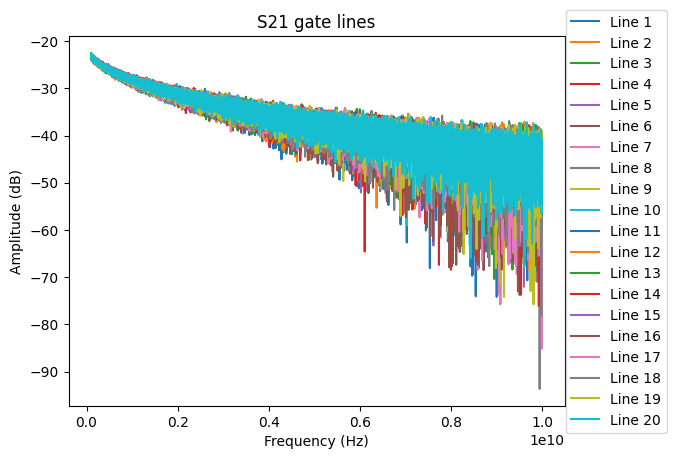

In [6]:
fig, ax = plt.subplots()
for i in range(len(d)-9):
    ax.plot(d['freq'], 20*np.log10(d[f'amp_{i}']), label=names[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.22, 1.09))
ax.set_title('S21 gate lines')

Text(0.5, 1.0, 'S21 R and T lines')

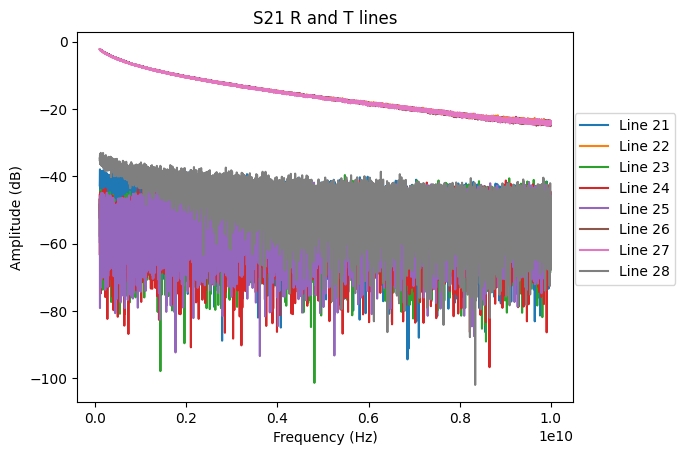

In [8]:
fig, ax = plt.subplots()
for i in range(len(d)-9, len(d)-1):
    ax.plot(d['freq'], 20*np.log10(d[f'amp_{i}']), label=names[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.22, 0.8))
ax.set_title('S21 R and T lines')

Text(0.5, 1.0, 'S21 R and T lines')

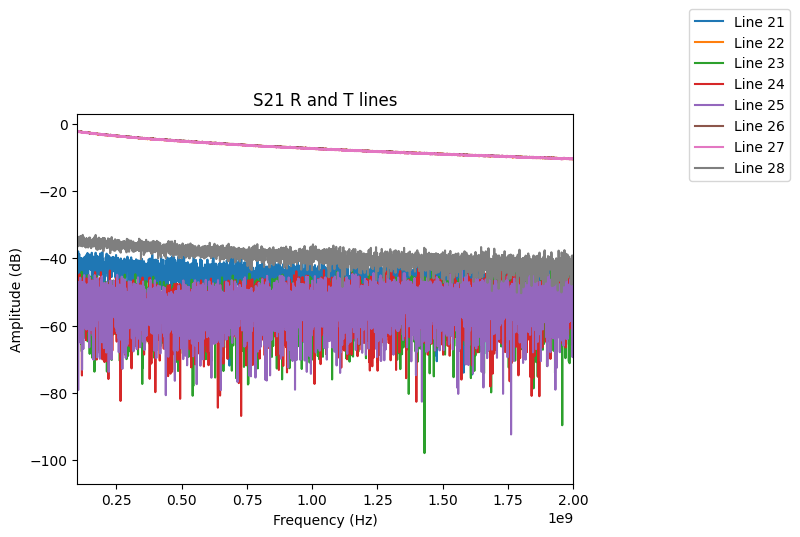

In [20]:
fig, ax = plt.subplots()
for i in range(len(d)-9, len(d)-1):
    # print(min(d['freq']))
    ax.plot(d['freq'], 20*np.log10(d[f'amp_{i}']), label=names[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_xlim(100000000,2000000000)

ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.22, 0.8))
ax.set_title('S21 R and T lines')

# Isolator and Directional Coupler installation

In [9]:


file_path_isol = r'C:\Users\LocalAdmin\Downloads\freki-isolator-11Feb2025.dat'
file_path_dir = r'C:\Users\LocalAdmin\Downloads\freki-dir-coup-12Feb2025.dat'
try:
    # Assuming data is in a structured format like CSV or similar
    df_isol = pd.read_csv(file_path_isol, sep=',')
    df_dir = pd.read_csv(file_path_dir, sep=',')
except FileNotFoundError:
    pass

In [10]:
cols_isol = list(df_isol.columns)
cols_dir = list(df_dir.columns)
d_isol = {}
d_dir = {}
for i, c in enumerate(cols_isol):
    if i==0:
        d_isol['freq'] = df_isol[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_isol)-1:
        d_isol[f'amp_{i//2 -1}'] = df_isol[c].to_numpy() + 1j*df_isol[cols_isol[i+1]].to_numpy()

for i, c in enumerate(cols_dir):
    if i==0:
        d_dir['freq'] = df_dir[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_dir)-1:
        d_dir[f'amp_{i//2 -1}'] = df_dir[c].to_numpy() + 1j*df_dir[cols_dir[i+1]].to_numpy()

In [8]:
d_dir.keys()

dict_keys(['freq', 'amp_0', 'amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5'])

In [11]:
names_isol = ['In->Out', 'Out->In', 'Line 26 w isol', 'Line 27 w isol']
names_dir = ['In->Out', 'Out->In', 'CPL->In', 'CPL->Out', 'Out->CPL', 'Line 21->22']


c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Isolator lines wo amplifier')

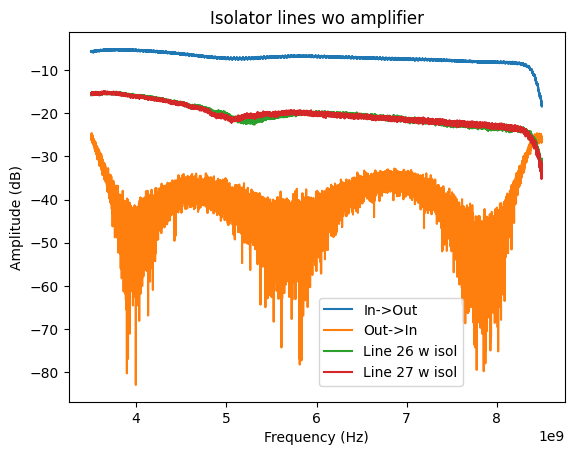

In [12]:
fig, ax = plt.subplots()
for i in range(len(d_isol)-1):
    ax.plot(d_isol['freq'], 20*np.log10(d_isol[f'amp_{i}']), label=names_isol[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=[0.65, 0.3])
ax.set_title('Isolator lines wo amplifier')

(100000.0, 2000000000.0)

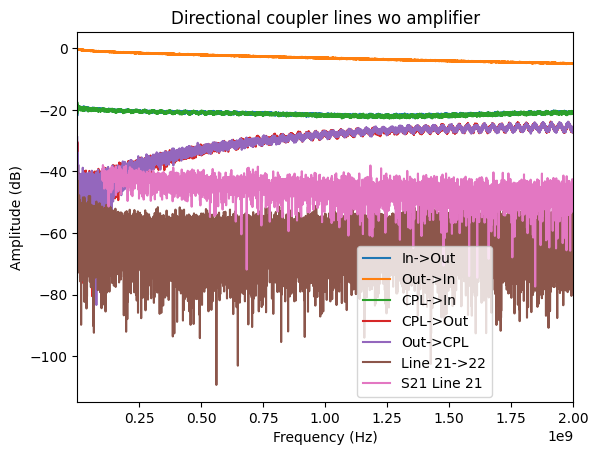

In [13]:
fig, ax = plt.subplots()
for i in range(len(d_dir)-1):
    ax.plot(d_dir['freq'], 20*np.log10(d_dir[f'amp_{i}']), label=names_dir[i])
ax.plot(d['freq'], 20*np.log10(d[f'amp_{len(d)-9}']), label='S21 Line 21')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=[0.7, 0.44])
ax.set_title('Directional coupler lines wo amplifier')
ax.set_xlim(min(d_dir['freq']), max(d_dir['freq']))

# LNF amplifiers

In [5]:
file_path = r'C:\Users\LocalAdmin\Downloads\17Mar-Freki-hemts.dat'
try:
    df_lnf = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

In [6]:
cols_lnf = list(df_lnf.columns)
d_lnf = {}
for i,c in enumerate(cols_lnf):
    if i == 0:
        d_lnf['freq'] = df_lnf[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_lnf)-1:
        d_lnf[f'amp_{i//2 -1}'] = df_lnf[c].to_numpy() + 1j*df_lnf[cols_lnf[i+1]].to_numpy()
    

In [14]:
d_lnf

{'freq': array([3.0000e+09, 3.0003e+09, 3.0006e+09, ..., 8.9994e+09, 8.9997e+09,
        9.0000e+09])}

In [7]:
Ids = [35.29, 37.15, 33.36, 31.33, 29.35, 27.32, 25.39, 23.31, 36.86, 35.28, 33.33, 31.33, 29.33, 27.37, 25.39, 23.37, 21.30]
Vgs = [2.305, 2.789, 2.142, 2.048, 1.969, 1.894, 1.801, 1.680, 2.855, 2.338, 2.199, 2.103, 2.023, 1.942, 1.850, 1.734, 1.586]

names_lnf = [f'$I_d=${i}mA, $V_g=${vg}V' for i, vg in zip(Ids, Vgs) ]


Text(0.5, 1.0, 'HEMT 1 @ RT ($V_d=1.302$V)')

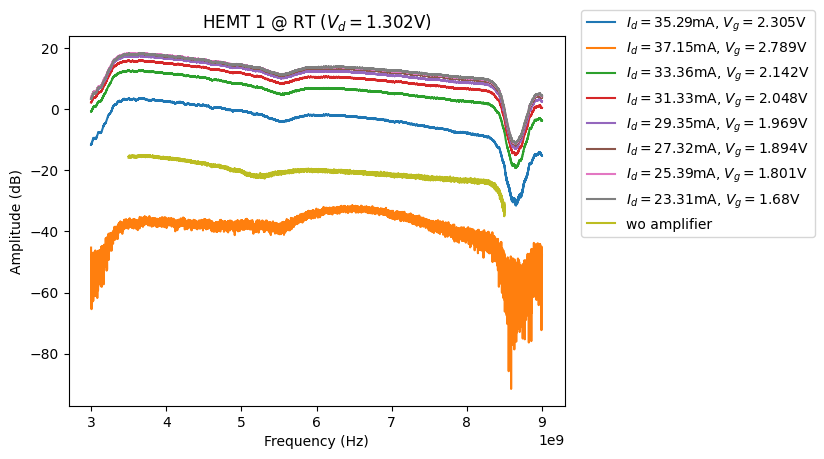

In [20]:
fig, ax = plt.subplots()
for i in range(8):
    ax.plot(d_lnf['freq'], 20*np.log10(d_lnf[f'amp_{i}']), label=names_lnf[i])
ax.plot(d_isol['freq'], 20*np.log10(d_isol[f'amp_{2}']), label='wo amplifier')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 1 @ RT ($V_d=1.302$V)')

Text(0.5, 1.0, 'HEMT 2 @ RT ($V_d=1.300$V)')

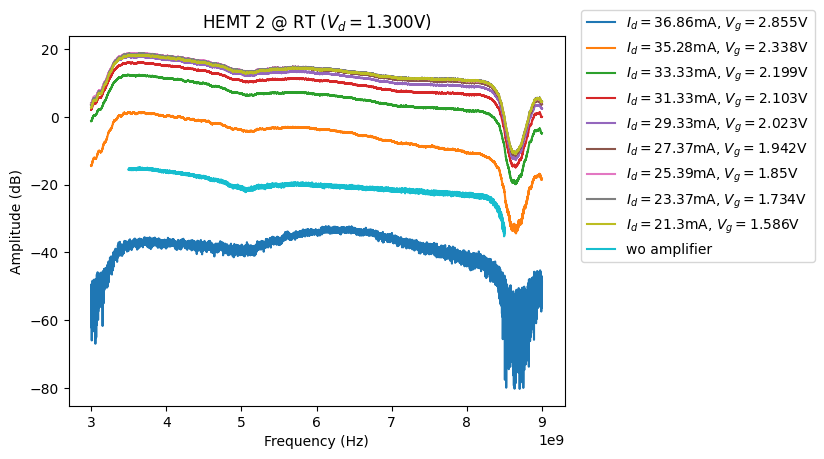

In [21]:
fig, ax = plt.subplots()
for i in range(8,len(d_lnf)-1):
    ax.plot(d_lnf['freq'], 20*np.log10(d_lnf[f'amp_{i}']), label=names_lnf[i])
ax.plot(d_isol['freq'], 20*np.log10(d_isol[f'amp_{3}']), label='wo amplifier')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 2 @ RT ($V_d=1.300$V)')

Gain (compared with wo amplifier)

In [12]:
base_hemt1 = np.average(20*np.log10(d_isol[f'amp_{2}'][:18000]))
base_hemt2 = np.average(20*np.log10(d_isol[f'amp_{3}'][:18000]))


HEMT 1: -19.90+0.07j dB


Text(0.5, 1.0, 'HEMT 1 gain @ RT ($V_d=1.302$V)')

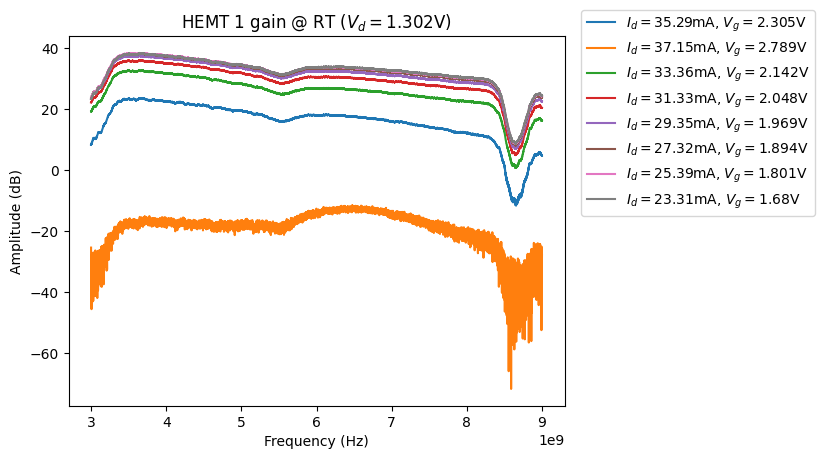

In [22]:
fig, ax = plt.subplots()
for i in range(8):
    ax.plot(d_lnf['freq'], 20*np.log10(d_lnf[f'amp_{i}']) - base_hemt1, label=names_lnf[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 1 gain @ RT ($V_d=1.302$V)')

Text(0.5, 1.0, 'HEMT 2 gain @ RT ($V_d=1.300$V)')

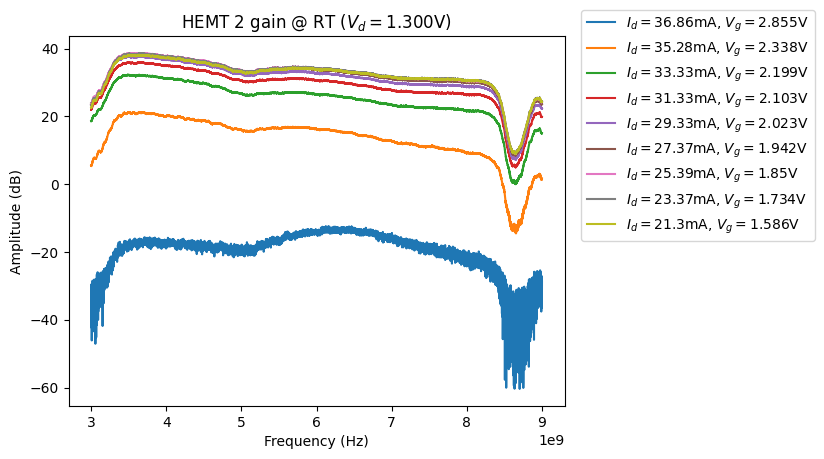

In [23]:
fig, ax = plt.subplots()
for i in range(8,len(d_lnf)-1):
    ax.plot(d_lnf['freq'], 20*np.log10(d_lnf[f'amp_{i}'])- base_hemt2, label=names_lnf[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 2 gain @ RT ($V_d=1.300$V)')

# CMT amplifier


In [15]:
file_path = r'C:\Users\LocalAdmin\Downloads\18Mar-freki-cmt-amp.dat'
try:
    df_cmt1 = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

file_path = r'C:\Users\LocalAdmin\Downloads\18Mar-freki-cmt-amp-v2.dat'
try:
    df_cmt2 = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass


In [16]:
cols_cmt1 = list(df_cmt1.columns)
cols_cmt2 = list(df_cmt2.columns)
d_cmt1 = {}
d_cmt2 = {}
for i,c in enumerate(cols_cmt1):
    if i == 0:
        d_cmt1['freq'] = df_cmt1[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_cmt1)-1:
        d_cmt1[f'amp_{i//2 -1}'] = df_cmt1[c].to_numpy() + 1j*df_cmt1[cols_cmt1[i+1]].to_numpy()

for i,c in enumerate(cols_cmt2):
    if i == 0:
        d_cmt2['freq'] = df_cmt2[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_cmt2)-1:
        d_cmt2[f'amp_{i//2 -1}'] = df_cmt2[c].to_numpy() + 1j*df_cmt2[cols_cmt2[i+1]].to_numpy()


In [35]:
names_cmt1 = ["V=2.5V"]
names_cmt2 = ['V=0', "V=2.5V"]

c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


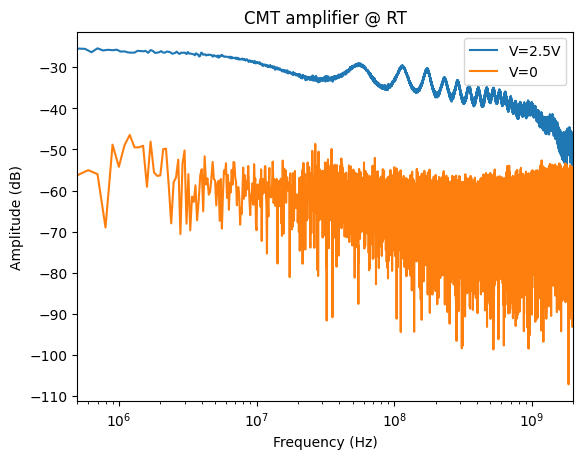

In [36]:
fig, ax = plt.subplots()
ax.semilogx(d_cmt1['freq'], 20*np.log10(d_cmt1[f'amp_{0}']), label=names_cmt1[0])
ax.semilogx(d_cmt2['freq'], 20*np.log10(d_cmt2[f'amp_{0}']), label=names_cmt2[0])

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title('CMT amplifier @ RT')
ax.set_xlim(500e3, 2e9)
ax.legend()


(500000.0, 2000000000.0)

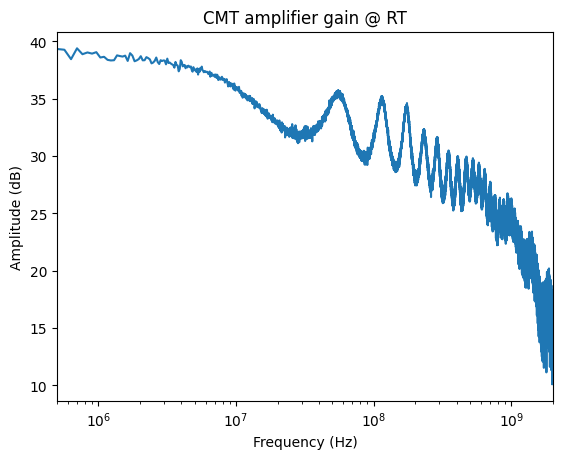

In [31]:
base = np.average(20*np.log10(d_cmt2[f'amp_{0}']))
fig, ax = plt.subplots()
ax.semilogx(d_cmt1['freq'], 20*np.log10(d_cmt1[f'amp_{0}']) - base, label=names_cmt1[0])

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title('CMT amplifier gain @ RT')
ax.set_xlim(500e3, 2e9)

# RT amplifier

In [57]:
file_path = r'C:\Users\LocalAdmin\Downloads\24Mar-RT-amp.dat'
try:
    df_rt = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass


In [58]:
cols_rt = list(df_rt.columns)
d_rt = {}
for i,c in enumerate(cols_rt):
    if i == 0:
        d_rt['freq'] = df_rt[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_rt)-1:
        d_rt[f'amp_{i//2 -1}'] = df_rt[c].to_numpy() + 1j*df_rt[cols_rt[i+1]].to_numpy()
        

c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'RT amplifier @ RT')

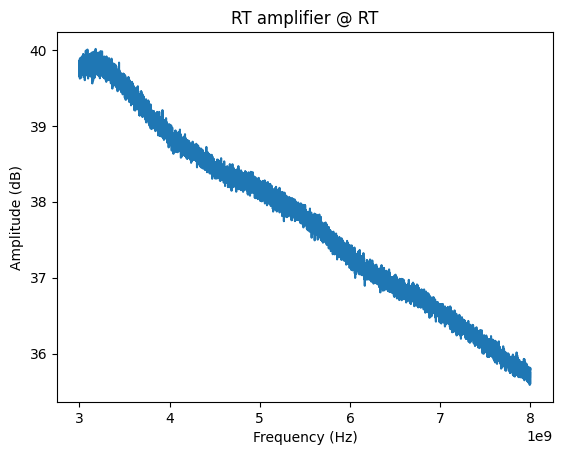

In [ ]:
fig, ax = plt.subplots()
ax.plot(d_rt['freq'], 20*np.log10(d_rt[f'amp_{0}']))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title('RT amplifier @ RT (-50dBm input)')

# HEMTs @ 4K

In [2]:
file_path = r'C:\Users\LocalAdmin\Downloads\24MAR-Freki-HEMT1.dat'
try:
    df_lnf1 = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

file_path = r'C:\Users\LocalAdmin\Downloads\24Mar-Freki-hemt2.dat'
try:
    df_lnf2 = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

In [3]:
cols_lnf1 = list(df_lnf1.columns)
cols_lnf2 = list(df_lnf2.columns)
d_lnf1 = {}
d_lnf2 = {}
for i,c in enumerate(cols_lnf1):
    if i == 0:
        d_lnf1['freq'] = df_lnf1[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_lnf1)-1:
        d_lnf1[f'amp_{i//2 -1}'] = df_lnf1[c].to_numpy() + 1j*df_lnf1[cols_lnf1[i+1]].to_numpy()

for i,c in enumerate(cols_lnf2):
    if i == 0:
        d_lnf2['freq'] = df_lnf2[c].to_numpy()
    if i>2 and i%2 == 1 and i<len(cols_lnf2)-1:
        d_lnf2[f'amp_{i//2 -1}'] = df_lnf2[c].to_numpy() + 1j*df_lnf2[cols_lnf2[i+1]].to_numpy()
        

In [4]:
Ids1 = [13.02, 11.96, 11.00, 10.01, 9.01, 8.01, 6.99, 14.07, 15.00, 16.00, 17.13, 20.03]
Vgs1 = [1.997, 1.937, 1.878, 1.817, 1.755, 1.691, 1.619, 2.052, 2.111, 2.172, 2.230, 2.353]
Ids2 = [20.01, 18.00, 16.98, 15.98, 14.99, 14.00, 13.01, 12.01, 11.03, 10.02, 8.97, 8.01]
Vgs2 = [2.472, 2.415, 2.381, 2.328, 2.245, 2.152, 2.065, 1.993, 1.929, 1.867, 1.803, 1.742]

names_lnf1 = [f'$I_d=${i}mA, $V_g=${vg}V' for i, vg in zip(Ids1, Vgs1) ]
names_lnf2 = [f'$I_d=${i}mA, $V_g=${vg}V' for i, vg in zip(Ids2, Vgs2) ]

c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LocalAdmin\anaconda3\envs\resonators\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'HEMT 1 @ 4K ($V_d=1.001$V)')

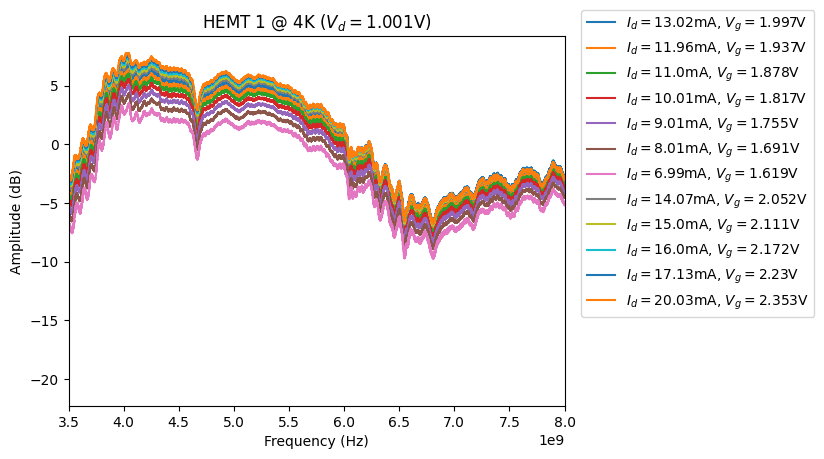

In [5]:
fig, ax = plt.subplots()
for i in range(len(d_lnf1)-1):
    ax.plot(d_lnf1['freq'], 20*np.log10(d_lnf1[f'amp_{i}']), label=names_lnf1[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_xlim(3.5e9, 8e9)
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 1 @ 4K ($V_d=1.001$V)')

Text(0.5, 1.0, 'HEMT 2 @ 4K ($V_d=1.000$V)')

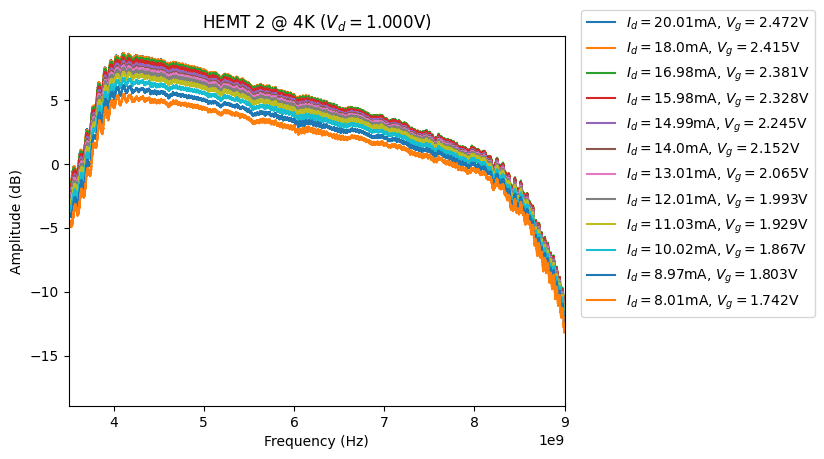

In [6]:
fig, ax = plt.subplots()
for i in range(len(d_lnf2)-1):
    ax.plot(d_lnf2['freq'], 20*np.log10(d_lnf2[f'amp_{i}']), label=names_lnf2[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_xlim(3.5e9, 9e9)
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 2 @ 4K ($V_d=1.000$V)')

Gain (compared with HEMT off)

Text(0.5, 1.0, 'HEMT 1 gain @ 4K ($V_d=1.001$V)')

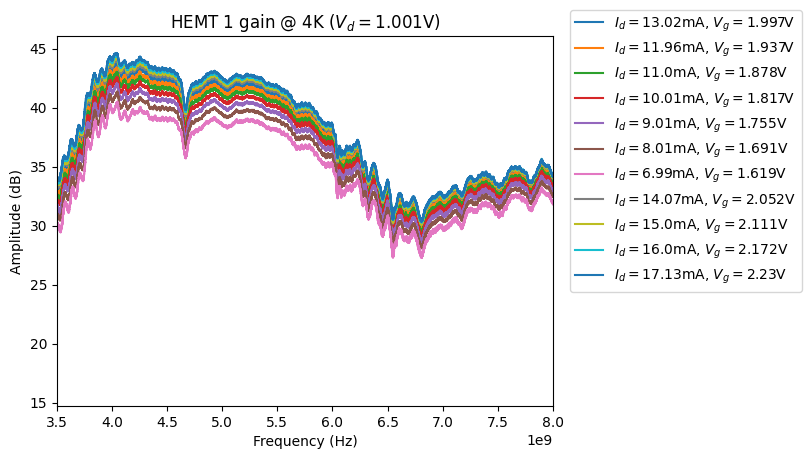

In [31]:
fig, ax = plt.subplots()
for i in range(len(d_lnf1)-2):
    ax.plot(d_lnf1['freq'], 20*np.log10(d_lnf1[f'amp_{i}'])+37, label=names_lnf1[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_xlim(3.5e9, 8e9)
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 1 gain @ 4K ($V_d=1.001$V)')


[3.00075e+09 3.00125e+09 3.00200e+09 ... 7.99750e+09 7.99825e+09
 7.99900e+09]


Text(0.5, 1.0, 'HEMT 1 @ 4K')

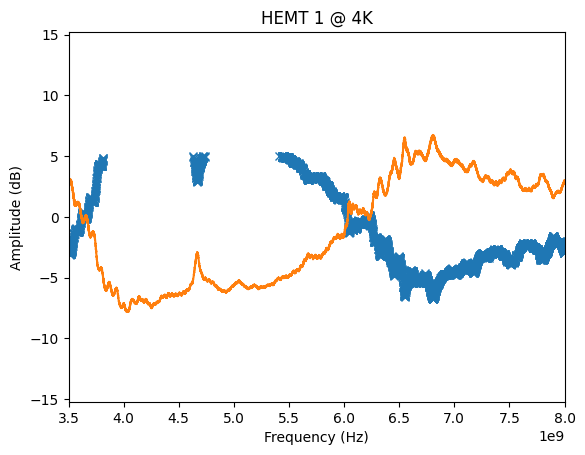

In [23]:
fig, ax = plt.subplots()
for i in [len(d_lnf1)-2]:
    peaks , _ = sp.find_peaks(-20*np.log10(d_lnf1[f'amp_{i}']),  height=-5)
    print(d_lnf1['freq'][peaks])
    ax.plot(d_lnf1['freq'][peaks], 20*np.log10(d_lnf1[f'amp_{i}'])[peaks], "x")
    ax.plot(d_lnf1['freq'], -20*np.log10(d_lnf1[f'amp_{i}']), label=names_lnf1[i])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_xlim(3.5e9, 8e9)
# ax.legend(bbox/_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 1 @ 4K')


Text(0.5, 1.0, 'HEMT 2 gain @ 4K ($V_d=1.000$V)')

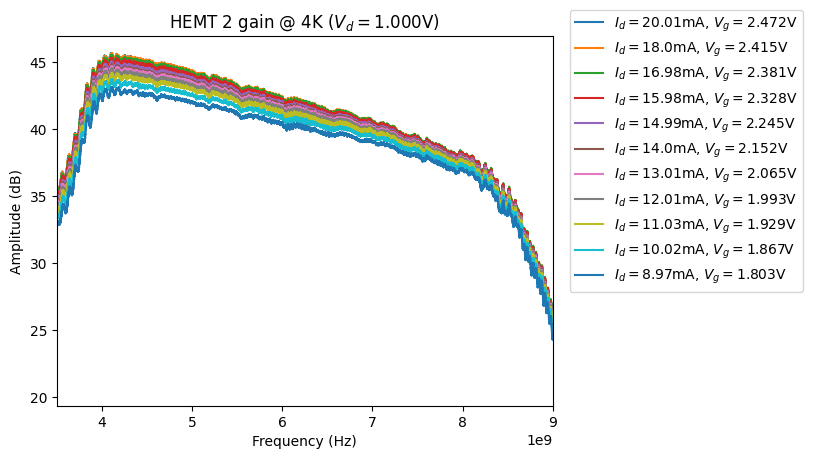

In [32]:
fig, ax = plt.subplots()
for i in range(len(d_lnf2)-2):
    ax.plot(d_lnf2['freq'], 20*np.log10(d_lnf2[f'amp_{i}'])+37, label=names_lnf2[i])



ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_xlim(3.5e9, 9e9)
ax.legend(bbox_to_anchor=(1.02, 1.09))
ax.set_title('HEMT 2 gain @ 4K ($V_d=1.000$V)')
